In [1]:
#Importing the libraries
import hapi 
import numpy as np
import matplotlib.pyplot as plt
from hapi import fetch, fetch_by_ids
import os

HAPI version: 1.1.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


In [6]:
if not(os.path.exists("data")):
  os.mkdir("data")

# Downloading the data for CO


#5 is reference for CO, 1 is reference for the main isotopologue which can be looked at https://hitran.org/docs/iso-meta/
fetch('data/CO',5,1, 1900, 2500) #1900 is 10000/1900 ~5.26 microns to 4 microns=2500 per cm)


#Hydrogen, helium broadening coefficients are not downloaded by default. Need to use a different functions
#Need to use global ID for this case
fetch_by_ids('data/CO_Additional',[26], 1900, 2500,ParameterGroups=['160-char'],Parameters=['gamma_H2', 'gamma_He', 'n_H2',
'n_He'])



Data is fetched from http://hitran.org

BEGIN DOWNLOAD: data/CO
  65536 bytes written to ./data/CO.data
Header written to ./data/CO.header
END DOWNLOAD
                     Lines parsed: 277
PROCESSED

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: data/CO_Additional
  65536 bytes written to ./data/CO_Additional.data
Header written to ./data/CO_Additional.header
END DOWNLOAD
                     Lines parsed: 277
PROCESSED


Using data

CO
                     Lines parsed: 277
CO_Additional
                     Lines parsed: 277
{'air': 1}
{'h2': 1}
{'he': 1}


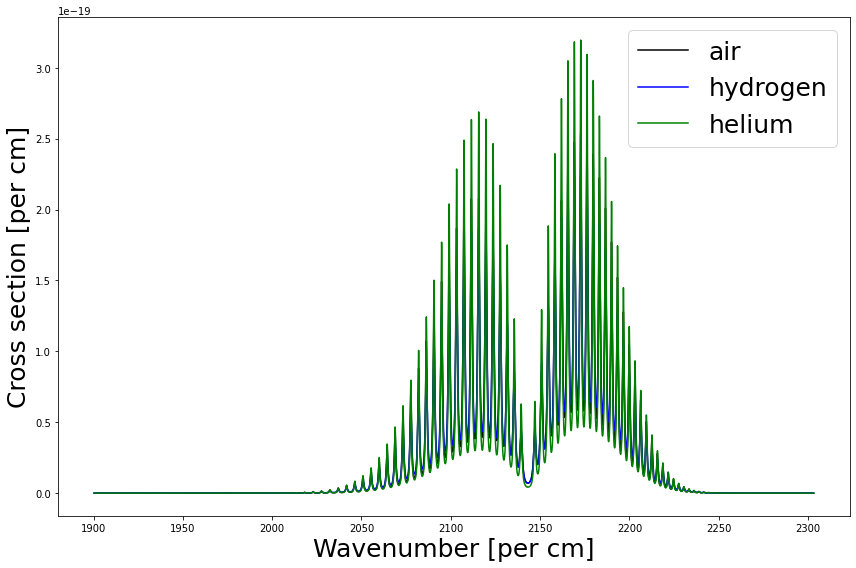

In [11]:
#Now let's calculate the cross-section

hapi.db_begin('data') #Load everything in the data website



#This is used to specify the temperature and pressure
#Environment={'p':1.0, 'T':296
nu_Voigt, coef_Voigt_air = hapi.absorptionCoefficient_Voigt(SourceTables='CO', Diluent={'air':1}, \
				Environment={'p':10.0 , 'T':296},  HITRAN_units=True)


_, coef_Voigt_H2 = hapi.absorptionCoefficient_Voigt(SourceTables='CO_Additional', Diluent={'h2':1}, \
				Environment={'p':10.0 , 'T':296},  HITRAN_units=True)


_, coef_Voigt_He = hapi.absorptionCoefficient_Voigt(SourceTables='CO_Additional', Diluent={'he':1}, \
				Environment={'p':10.0 , 'T':296},  HITRAN_units=True)


#Now plotting

plt.figure(figsize=(12,8))
plt.plot(nu_Voigt, coef_Voigt_air, "k-", label="air")
plt.plot(nu_Voigt, coef_Voigt_H2, "b-", label="hydrogen")
plt.plot(nu_Voigt, coef_Voigt_He, "g-", label="helium")
plt.legend(loc=1, fontsize=25)
plt.xlabel("Wavenumber [per cm]", fontsize=25)
plt.ylabel("Cross section [per cm]", fontsize=25)
plt.tight_layout()
plt.show()
